# **Depression Detection**
Here, we will be predicting whether a person is depressed or not through their messages

Additional libraries used here are:



**NLTK:** Natural Language Toolkit. It is a suite that contains libraries and programs for statistical language processing. It is one of the most powerful NLP libraries, which contains packages to make machines understand human language and reply to it with an appropriate response.

**WordCloud:** Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called the Tag Cloud or WordCloud. Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

In the given dataset, under the feature marked as 'label', if the message is marked as 0 it doesn't indicate depression. If the message is marked as 1, it indicates depression.

First, we import the necessary libraries for our predictive analysis.

In [1]:
import pandas as pd
import seaborn as sns

Next we read our dataset which we will be using for our predictive analysis.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
depression_df = pd.read_csv('/content/drive/MyDrive/depression_data.csv')

depression_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


from matplotlib import pyplot as plt
depression_df['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
depression_df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
depression_df.plot(kind='scatter', x='Unnamed: 0', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Unnamed: 0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Unnamed: 0'}, axis=1)
              .sort_values('Unnamed: 0', ascending=True))
  xs = counted['Unnamed: 0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = depression_df.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = depression_df.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
depression_df['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
depression_df['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

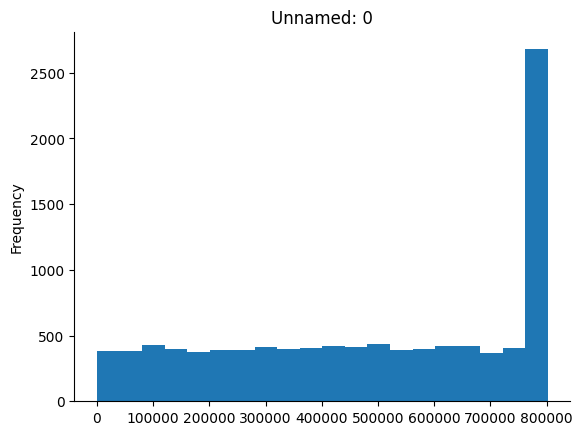

In [6]:
from matplotlib import pyplot as plt
depression_df['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
depression_df['message'].iloc[:1]

0    just had a real good moment. i missssssssss hi...
Name: message, dtype: object

In [8]:
depression_df.columns

Index(['Unnamed: 0', 'message', 'label'], dtype='object')

Next, we get rid of unecessary features.

In [9]:
depression_df = depression_df.drop('Unnamed: 0',axis=1)

In [10]:
depression_df

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


Obtaining final dimensions of our dataset after eliminating unwanted features.

In [11]:

depression_df.shape

(10314, 2)

Next, we analyse how many messages indicate depression and how any don't.

<Axes: ylabel='count'>

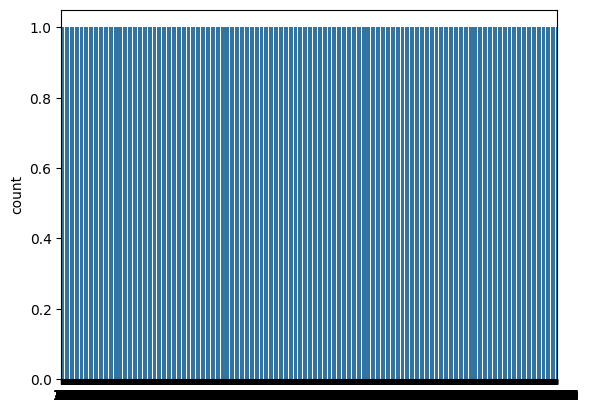

In [12]:
sns.countplot(depression_df['label'])

Next, we import the additional libraries.

In [13]:
import nltk
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download('all')
from nltk.corpus import stopwords
wo = WordNetLemmatizer()
corpus=[]
for i in range(0,len(depression_df)):
    message = re.sub('[^a-zA-Z]',' ',depression_df['message'][i])
    message = message.lower()
    message = message.split()
    message = [wo.lemmatize(word) for word in message ]
    message = ' '.join(message)
    corpus.append(message)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [14]:
corpus[2]

'comeagainjen http twitpic com y lx http www youtube com watch v zogfqvh me'

Here, we obtain a group of words, indicating depression from our dataset using wordcloud.

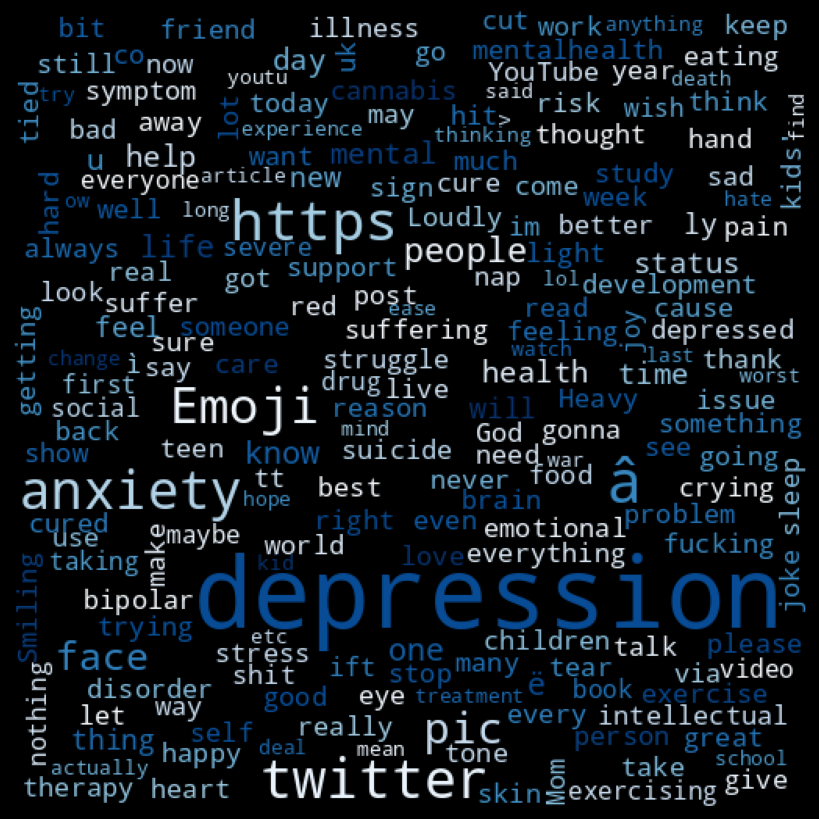

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
depressive_words = ' '.join(list(depression_df[depression_df['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Here, we obtain a group of words, that indicate positvity from our dataset using wordcloud.

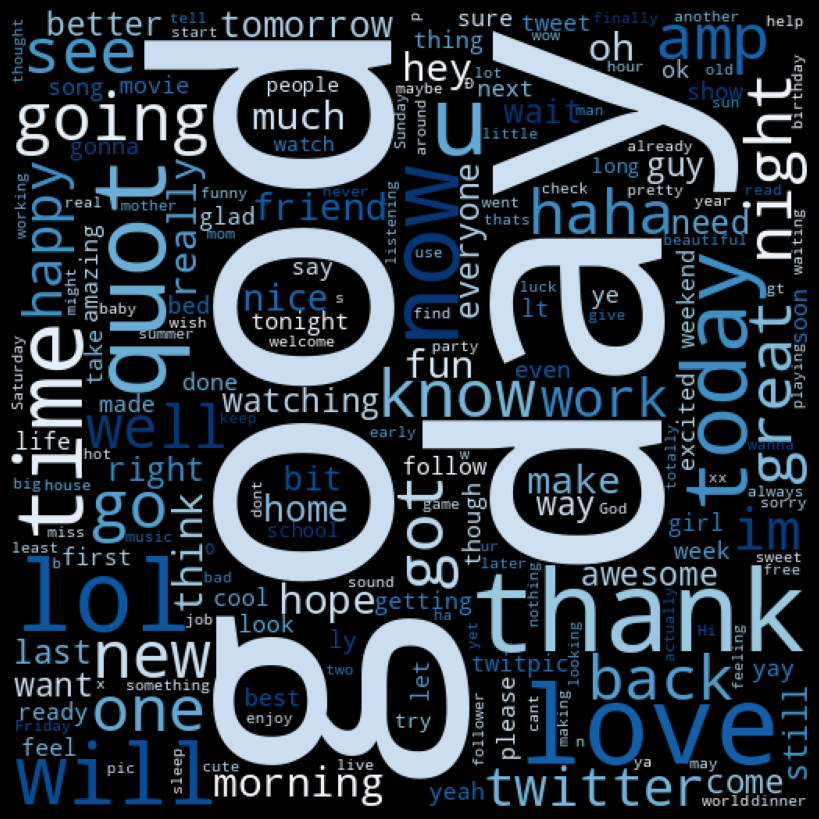

In [16]:
positive_words = ' '.join(list(depression_df[depression_df['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'),
plt.tight_layout(pad = 0)
plt.show()

Now, we split our dataset into train data and test data.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus,depression_df['label'],test_size=0.25,random_state=42)

Next, we extract important features from our dataset in order to train our model.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( ngram_range=(1,3), stop_words='english',max_features=15000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

Obtaining dimensions of our train dataset.

In [19]:
X_train_vect.shape

(7735, 15000)

Here, we sample our data.

In [20]:
from imblearn import under_sampling
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_resample(X_train_vect, y_train)
x_test_resample, y_test_resample = SMOTE().fit_resample(X_test_vect, y_test)
# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(11978, 15000)
(11978,)


Now, we apply logistic regression model for prediction.

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(x_resample,y_resample)

LogisticRegression()

Now, we generate the classification report for checking the accuracy of our model.

In [22]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2011
           1       0.99      0.96      0.97      2011

    accuracy                           0.97      4022
   macro avg       0.98      0.97      0.97      4022
weighted avg       0.98      0.97      0.97      4022



Now, we apply Naive Bayes MultinomialNb model for prediction and generate the classification report for checking the accuracy of our model.

In [23]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_resample,y_resample)

MultinomialNB()

In [24]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = mnb.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2011
           1       0.95      0.96      0.95      2011

    accuracy                           0.95      4022
   macro avg       0.95      0.95      0.95      4022
weighted avg       0.95      0.95      0.95      4022



Now, we take the user's input and predict whether the message indicates depression or not. We map the predicted value '1' to a depressive message and the predicted value '0' to a positive message.

In [25]:
def preprocess(data):
    #preprocess
    a = re.sub('[^a-zA-Z]',' ',data)
    a = a.lower()
    a = a.split()
    a = [wo.lemmatize(word) for word in a ]
    a = ' '.join(a)
    return a

In [35]:
import builtins
import re
strr = input('Enter Your Message: ')
print("-------------------------------")
examples = strr

a = preprocess(examples)

example_counts = vectorizer.transform([a])
prediction =mnb.predict(example_counts)
prediction[0]

if prediction[0]==0:
    print('Positive')
elif prediction[0]==1:
    print('Depressive')

Enter Your Message: i do not know
-------------------------------
Positive
